# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [33]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

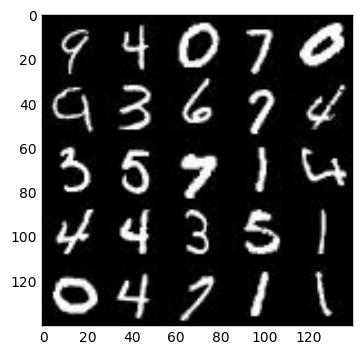

In [34]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

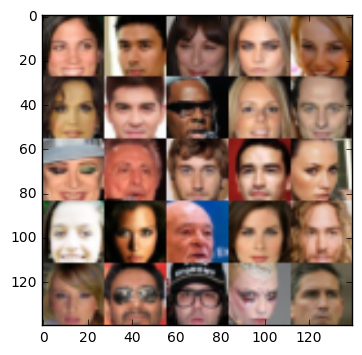

In [35]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [36]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.1
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [37]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_images = tf.placeholder(tf.float32,[None, image_width, image_height, image_channels],name='input_images')
    input_z = tf.placeholder(tf.float32,[None,z_dim],name = 'input_z')
    learning_rate = tf.placeholder(tf.float32,name = "learing_rate")
    return input_images, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [58]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        C1 = tf.layers.conv2d(images,64,3,strides=2, padding='same')
        M1 = tf.maximum(alpha*C1,C1)
        
        C2 = tf.layers.conv2d(M1,128,3,strides=2,padding='same')
        M2 = tf.maximum(alpha*C2,C2)
        
        C3 = tf.layers.conv2d(M2,256,3,strides=2,padding='same')
        B3 = tf.layers.batch_normalization(C3, training=True)
        M3 = tf.maximum(alpha*B3,B3)
#         print(M3.shape)
        flat = tf.reshape(M3, (-1, 4*4*128))
        
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)
    return out, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [59]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function 
#     print(z)
    with tf.variable_scope('generator',reuse=(not is_train)):
        alpha = 0.2
        x1 = tf.layers.dense(z,7*7*128)
        x1 = tf.reshape(x1, (-1,7,7,128))
        x1 = tf.layers.batch_normalization(x1,training=is_train)

        C1 = tf.layers.conv2d_transpose(x1,64,3,strides=2,padding='same')
        B1 = tf.layers.batch_normalization(C1,training=is_train)
        M1 = tf.maximum(alpha*B1,B1)

        C2 = tf.layers.conv2d_transpose(M1,32,3,strides=2,padding='same')
        B2 = tf.layers.batch_normalization(C2,training=is_train)
        M2 = tf.maximum(alpha*B2,B2)
        
        logits = tf.layers.conv2d_transpose(M2,out_channel_dim,3,strides=1,padding='same')
        output = tf.tanh(logits)
    return output


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [60]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    al = 0.1
    g_out = generator(input_z, out_channel_dim, is_train=True)
    d_out_real,d_logits_real = discriminator(input_real, reuse=False)
    dg_out,dg_logits = discriminator(g_out, reuse=True)
    
    dg_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dg_logits,labels=tf.ones_like(dg_out)))
    
    dr_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_out_real)*(1-al)))
    d_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dg_logits,labels=tf.zeros_like(dg_out)))
    d_loss = dr_loss+d_loss
    return d_loss, dg_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [61]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_var = tf.trainable_variables()
    dgr = [var for var in t_var if var.name.startswith('discriminator')]
    gen = [var for var in t_var if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_opt_train = tf.train.AdamOptimizer(beta1=beta1,learning_rate=learning_rate).minimize(d_loss,var_list=dgr)
        g_opt_train = tf.train.AdamOptimizer(beta1=beta1,learning_rate=learning_rate).minimize(g_loss,var_list=gen)
    return d_opt_train, g_opt_train


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [62]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [68]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    input_images, input_z, learning_rate1 = model_inputs(data_shape[1],data_shape[2],data_shape[3],z_dim)
    
    d_loss, dg_loss = model_loss(input_images, input_z, data_shape[3])
    
    d_opt_train, dg_opt_train = model_opt(d_loss, dg_loss, learning_rate, beta1)
    

    print_times = 20
    show_times = 200

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        step = 0
        
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):

            
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                feed = {input_images: batch_images, input_z: batch_z, learning_rate1: learning_rate}
                
                sess.run(d_opt_train, feed_dict=feed)  
                sess.run(dg_opt_train, feed_dict=feed)
                
                if step%print_times==0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_images: batch_images})
                    train_loss_g = dg_loss.eval({input_z: batch_z})
                    print("step {}, (epoch {}/{})...".format(step, epoch_i+1, epoch_count),
                          "discriminator loss: {:.3f}...".format(train_loss_d),
                          "generator loss: {:.3f}".format(train_loss_g))
                
                    
                if step%show_times==0:
                    show_generator_output(sess, 64, input_z, data_shape[3], data_image_mode)
                step += 1

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

step 0, (epoch 1/3)... discriminator loss: 1.158... generator loss: 0.698


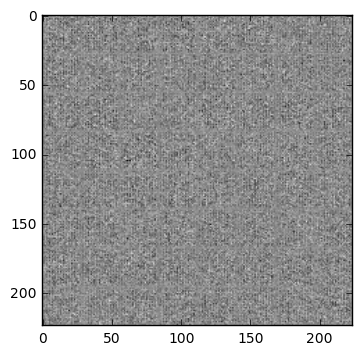

step 20, (epoch 1/3)... discriminator loss: 0.756... generator loss: 1.232
step 40, (epoch 1/3)... discriminator loss: 1.018... generator loss: 2.820
step 60, (epoch 1/3)... discriminator loss: 0.597... generator loss: 2.664
step 80, (epoch 1/3)... discriminator loss: 0.432... generator loss: 2.716
step 100, (epoch 1/3)... discriminator loss: 0.384... generator loss: 3.514
step 120, (epoch 1/3)... discriminator loss: 0.372... generator loss: 3.732
step 140, (epoch 1/3)... discriminator loss: 0.393... generator loss: 3.098
step 160, (epoch 1/3)... discriminator loss: 1.199... generator loss: 0.671
step 180, (epoch 1/3)... discriminator loss: 0.715... generator loss: 1.300
step 200, (epoch 1/3)... discriminator loss: 1.787... generator loss: 0.333


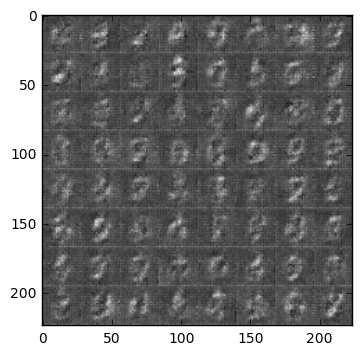

step 220, (epoch 1/3)... discriminator loss: 0.608... generator loss: 1.914
step 240, (epoch 1/3)... discriminator loss: 0.662... generator loss: 1.524
step 260, (epoch 1/3)... discriminator loss: 0.719... generator loss: 2.191
step 280, (epoch 1/3)... discriminator loss: 0.863... generator loss: 3.354
step 300, (epoch 1/3)... discriminator loss: 0.549... generator loss: 1.795
step 320, (epoch 1/3)... discriminator loss: 0.756... generator loss: 3.077
step 340, (epoch 1/3)... discriminator loss: 0.776... generator loss: 3.102
step 360, (epoch 1/3)... discriminator loss: 0.935... generator loss: 0.863
step 380, (epoch 1/3)... discriminator loss: 0.653... generator loss: 1.582
step 400, (epoch 1/3)... discriminator loss: 0.621... generator loss: 1.564


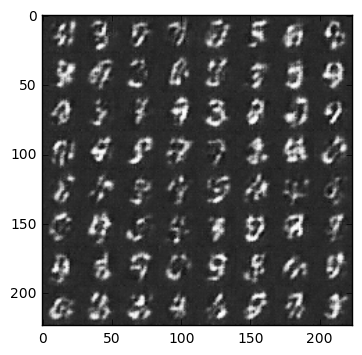

step 420, (epoch 1/3)... discriminator loss: 2.170... generator loss: 0.221
step 440, (epoch 1/3)... discriminator loss: 0.607... generator loss: 1.886
step 460, (epoch 1/3)... discriminator loss: 0.729... generator loss: 1.486
step 480, (epoch 1/3)... discriminator loss: 0.690... generator loss: 3.082
step 500, (epoch 1/3)... discriminator loss: 0.698... generator loss: 1.350
step 520, (epoch 1/3)... discriminator loss: 1.218... generator loss: 0.610
step 540, (epoch 1/3)... discriminator loss: 0.585... generator loss: 1.661
step 560, (epoch 1/3)... discriminator loss: 0.620... generator loss: 2.508
step 580, (epoch 1/3)... discriminator loss: 1.429... generator loss: 0.497
step 600, (epoch 1/3)... discriminator loss: 0.490... generator loss: 2.428


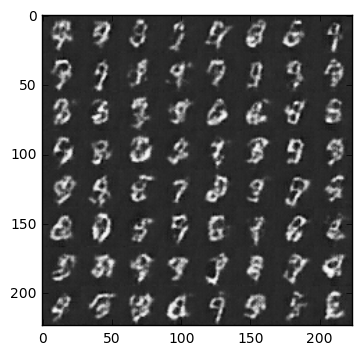

step 620, (epoch 1/3)... discriminator loss: 0.539... generator loss: 2.371
step 640, (epoch 1/3)... discriminator loss: 0.605... generator loss: 2.590
step 660, (epoch 1/3)... discriminator loss: 0.862... generator loss: 1.096
step 680, (epoch 1/3)... discriminator loss: 0.460... generator loss: 2.781
step 700, (epoch 1/3)... discriminator loss: 0.954... generator loss: 0.937
step 720, (epoch 1/3)... discriminator loss: 0.575... generator loss: 1.912
step 740, (epoch 1/3)... discriminator loss: 1.420... generator loss: 0.527
step 760, (epoch 1/3)... discriminator loss: 0.488... generator loss: 3.163
step 780, (epoch 1/3)... discriminator loss: 1.260... generator loss: 0.618
step 800, (epoch 1/3)... discriminator loss: 0.522... generator loss: 2.829


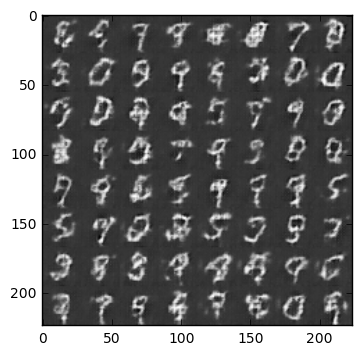

step 820, (epoch 1/3)... discriminator loss: 0.564... generator loss: 2.084
step 840, (epoch 1/3)... discriminator loss: 0.661... generator loss: 2.169
step 860, (epoch 1/3)... discriminator loss: 0.565... generator loss: 2.722
step 880, (epoch 1/3)... discriminator loss: 0.561... generator loss: 2.092
step 900, (epoch 1/3)... discriminator loss: 1.053... generator loss: 3.975
step 920, (epoch 1/3)... discriminator loss: 0.545... generator loss: 2.024
step 940, (epoch 2/3)... discriminator loss: 0.496... generator loss: 3.047
step 960, (epoch 2/3)... discriminator loss: 0.515... generator loss: 2.275
step 980, (epoch 2/3)... discriminator loss: 0.530... generator loss: 2.671
step 1000, (epoch 2/3)... discriminator loss: 0.563... generator loss: 1.911


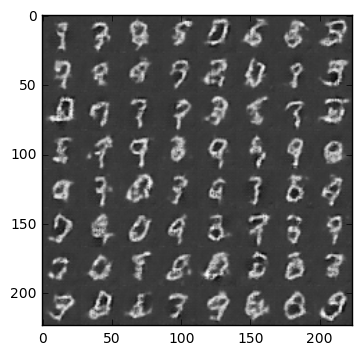

step 1020, (epoch 2/3)... discriminator loss: 0.552... generator loss: 2.146
step 1040, (epoch 2/3)... discriminator loss: 0.643... generator loss: 2.760
step 1060, (epoch 2/3)... discriminator loss: 0.536... generator loss: 2.019
step 1080, (epoch 2/3)... discriminator loss: 0.530... generator loss: 2.153
step 1100, (epoch 2/3)... discriminator loss: 0.631... generator loss: 2.519
step 1120, (epoch 2/3)... discriminator loss: 0.536... generator loss: 2.467
step 1140, (epoch 2/3)... discriminator loss: 0.558... generator loss: 1.949
step 1160, (epoch 2/3)... discriminator loss: 1.558... generator loss: 0.503
step 1180, (epoch 2/3)... discriminator loss: 1.257... generator loss: 5.116
step 1200, (epoch 2/3)... discriminator loss: 0.715... generator loss: 4.185


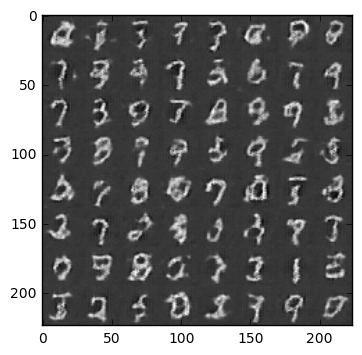

step 1220, (epoch 2/3)... discriminator loss: 0.610... generator loss: 1.682
step 1240, (epoch 2/3)... discriminator loss: 0.534... generator loss: 2.063
step 1260, (epoch 2/3)... discriminator loss: 1.018... generator loss: 0.880
step 1280, (epoch 2/3)... discriminator loss: 0.576... generator loss: 1.879
step 1300, (epoch 2/3)... discriminator loss: 1.037... generator loss: 0.844
step 1320, (epoch 2/3)... discriminator loss: 0.597... generator loss: 1.844
step 1340, (epoch 2/3)... discriminator loss: 0.511... generator loss: 2.607
step 1360, (epoch 2/3)... discriminator loss: 0.493... generator loss: 2.262
step 1380, (epoch 2/3)... discriminator loss: 0.457... generator loss: 2.704
step 1400, (epoch 2/3)... discriminator loss: 0.470... generator loss: 2.737


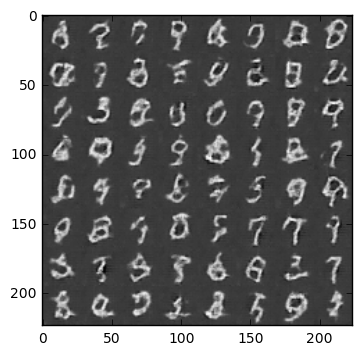

step 1420, (epoch 2/3)... discriminator loss: 0.548... generator loss: 2.249
step 1440, (epoch 2/3)... discriminator loss: 0.696... generator loss: 4.039
step 1460, (epoch 2/3)... discriminator loss: 0.545... generator loss: 2.154
step 1480, (epoch 2/3)... discriminator loss: 0.493... generator loss: 2.739
step 1500, (epoch 2/3)... discriminator loss: 0.437... generator loss: 2.882
step 1520, (epoch 2/3)... discriminator loss: 0.593... generator loss: 1.789
step 1540, (epoch 2/3)... discriminator loss: 0.539... generator loss: 3.694
step 1560, (epoch 2/3)... discriminator loss: 0.534... generator loss: 2.748
step 1580, (epoch 2/3)... discriminator loss: 0.550... generator loss: 1.926
step 1600, (epoch 2/3)... discriminator loss: 1.215... generator loss: 0.678


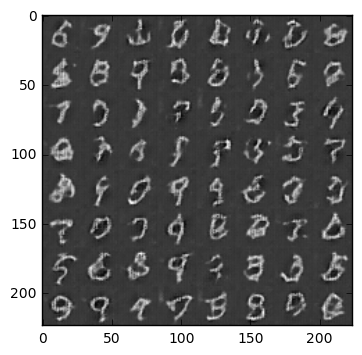

step 1620, (epoch 2/3)... discriminator loss: 0.983... generator loss: 0.921
step 1640, (epoch 2/3)... discriminator loss: 0.516... generator loss: 2.168
step 1660, (epoch 2/3)... discriminator loss: 0.533... generator loss: 2.395
step 1680, (epoch 2/3)... discriminator loss: 0.551... generator loss: 2.223
step 1700, (epoch 2/3)... discriminator loss: 0.471... generator loss: 2.668
step 1720, (epoch 2/3)... discriminator loss: 0.455... generator loss: 2.702
step 1740, (epoch 2/3)... discriminator loss: 0.647... generator loss: 2.867
step 1760, (epoch 2/3)... discriminator loss: 0.549... generator loss: 2.389
step 1780, (epoch 2/3)... discriminator loss: 0.486... generator loss: 2.398
step 1800, (epoch 2/3)... discriminator loss: 0.711... generator loss: 1.373


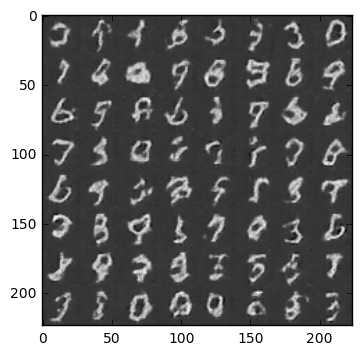

step 1820, (epoch 2/3)... discriminator loss: 0.593... generator loss: 3.572
step 1840, (epoch 2/3)... discriminator loss: 0.446... generator loss: 3.158
step 1860, (epoch 2/3)... discriminator loss: 0.748... generator loss: 3.705
step 1880, (epoch 3/3)... discriminator loss: 0.771... generator loss: 2.626
step 1900, (epoch 3/3)... discriminator loss: 0.522... generator loss: 2.502
step 1920, (epoch 3/3)... discriminator loss: 0.469... generator loss: 2.798
step 1940, (epoch 3/3)... discriminator loss: 0.498... generator loss: 2.311
step 1960, (epoch 3/3)... discriminator loss: 0.587... generator loss: 2.562
step 1980, (epoch 3/3)... discriminator loss: 0.816... generator loss: 1.144
step 2000, (epoch 3/3)... discriminator loss: 0.603... generator loss: 1.745


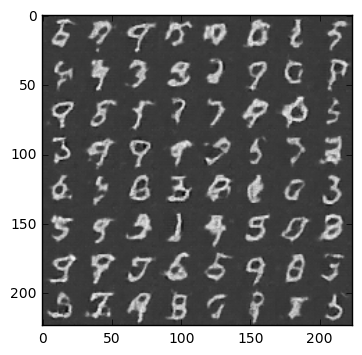

step 2020, (epoch 3/3)... discriminator loss: 0.499... generator loss: 2.343
step 2040, (epoch 3/3)... discriminator loss: 0.600... generator loss: 1.821
step 2060, (epoch 3/3)... discriminator loss: 0.511... generator loss: 3.248
step 2080, (epoch 3/3)... discriminator loss: 0.549... generator loss: 2.706
step 2100, (epoch 3/3)... discriminator loss: 0.436... generator loss: 2.865
step 2120, (epoch 3/3)... discriminator loss: 0.458... generator loss: 2.827
step 2140, (epoch 3/3)... discriminator loss: 0.512... generator loss: 2.151
step 2160, (epoch 3/3)... discriminator loss: 0.469... generator loss: 2.473
step 2180, (epoch 3/3)... discriminator loss: 0.564... generator loss: 3.075
step 2200, (epoch 3/3)... discriminator loss: 1.058... generator loss: 0.868


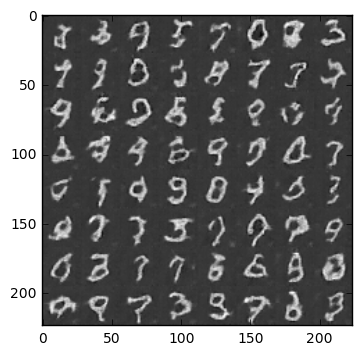

step 2220, (epoch 3/3)... discriminator loss: 0.565... generator loss: 2.913
step 2240, (epoch 3/3)... discriminator loss: 0.456... generator loss: 3.360
step 2260, (epoch 3/3)... discriminator loss: 1.197... generator loss: 0.752
step 2280, (epoch 3/3)... discriminator loss: 0.541... generator loss: 2.100
step 2300, (epoch 3/3)... discriminator loss: 0.612... generator loss: 1.717
step 2320, (epoch 3/3)... discriminator loss: 0.432... generator loss: 2.893
step 2340, (epoch 3/3)... discriminator loss: 0.609... generator loss: 4.702
step 2360, (epoch 3/3)... discriminator loss: 0.712... generator loss: 1.352
step 2380, (epoch 3/3)... discriminator loss: 0.486... generator loss: 2.758
step 2400, (epoch 3/3)... discriminator loss: 0.606... generator loss: 1.751


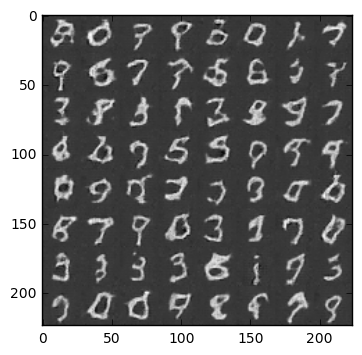

step 2420, (epoch 3/3)... discriminator loss: 0.634... generator loss: 5.049
step 2440, (epoch 3/3)... discriminator loss: 0.447... generator loss: 2.706
step 2460, (epoch 3/3)... discriminator loss: 0.639... generator loss: 2.345
step 2480, (epoch 3/3)... discriminator loss: 0.542... generator loss: 2.805
step 2500, (epoch 3/3)... discriminator loss: 0.608... generator loss: 1.683
step 2520, (epoch 3/3)... discriminator loss: 0.543... generator loss: 3.430
step 2540, (epoch 3/3)... discriminator loss: 0.616... generator loss: 1.785
step 2560, (epoch 3/3)... discriminator loss: 0.525... generator loss: 2.583
step 2580, (epoch 3/3)... discriminator loss: 0.479... generator loss: 2.448
step 2600, (epoch 3/3)... discriminator loss: 0.444... generator loss: 3.373


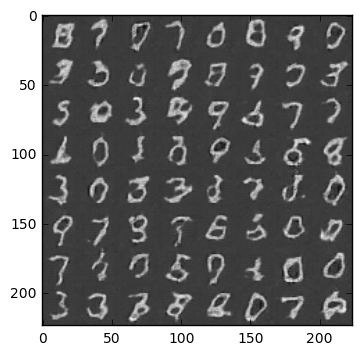

step 2620, (epoch 3/3)... discriminator loss: 0.475... generator loss: 2.905
step 2640, (epoch 3/3)... discriminator loss: 0.444... generator loss: 2.753
step 2660, (epoch 3/3)... discriminator loss: 0.408... generator loss: 3.522
step 2680, (epoch 3/3)... discriminator loss: 0.451... generator loss: 3.194
step 2700, (epoch 3/3)... discriminator loss: 0.561... generator loss: 4.267
step 2720, (epoch 3/3)... discriminator loss: 0.670... generator loss: 1.569
step 2740, (epoch 3/3)... discriminator loss: 0.532... generator loss: 3.373
step 2760, (epoch 3/3)... discriminator loss: 0.647... generator loss: 3.099
step 2780, (epoch 3/3)... discriminator loss: 0.492... generator loss: 2.267
step 2800, (epoch 3/3)... discriminator loss: 1.338... generator loss: 0.649


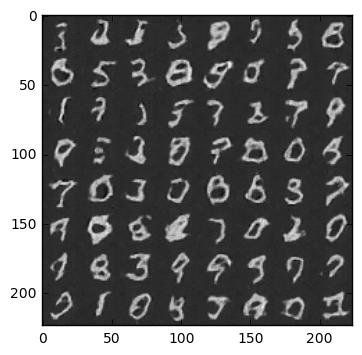

In [69]:
batch_size = 64
z_dim = 100
learning_rate = 0.0003
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 3

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

step 0, (epoch 1/1)... discriminator loss: 1.283... generator loss: 0.804


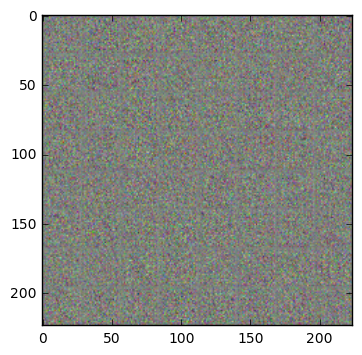

step 20, (epoch 1/1)... discriminator loss: 0.462... generator loss: 2.786
step 40, (epoch 1/1)... discriminator loss: 0.376... generator loss: 3.665
step 60, (epoch 1/1)... discriminator loss: 0.356... generator loss: 4.375
step 80, (epoch 1/1)... discriminator loss: 0.356... generator loss: 4.868
step 100, (epoch 1/1)... discriminator loss: 0.341... generator loss: 4.817
step 120, (epoch 1/1)... discriminator loss: 0.337... generator loss: 5.305
step 140, (epoch 1/1)... discriminator loss: 0.370... generator loss: 6.477
step 160, (epoch 1/1)... discriminator loss: 0.358... generator loss: 3.625
step 180, (epoch 1/1)... discriminator loss: 0.554... generator loss: 1.734
step 200, (epoch 1/1)... discriminator loss: 0.612... generator loss: 1.800


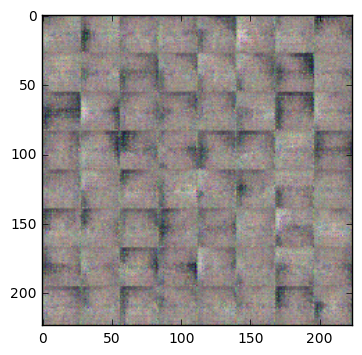

step 220, (epoch 1/1)... discriminator loss: 1.207... generator loss: 0.661
step 240, (epoch 1/1)... discriminator loss: 2.070... generator loss: 0.265
step 260, (epoch 1/1)... discriminator loss: 0.752... generator loss: 2.193
step 280, (epoch 1/1)... discriminator loss: 0.765... generator loss: 2.190
step 300, (epoch 1/1)... discriminator loss: 0.845... generator loss: 1.306
step 320, (epoch 1/1)... discriminator loss: 0.678... generator loss: 1.740
step 340, (epoch 1/1)... discriminator loss: 0.766... generator loss: 1.512
step 360, (epoch 1/1)... discriminator loss: 0.989... generator loss: 0.943
step 380, (epoch 1/1)... discriminator loss: 0.948... generator loss: 1.958
step 400, (epoch 1/1)... discriminator loss: 0.776... generator loss: 1.989


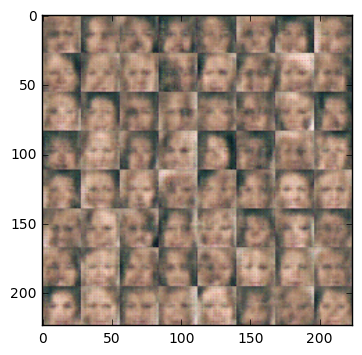

step 420, (epoch 1/1)... discriminator loss: 0.751... generator loss: 1.562
step 440, (epoch 1/1)... discriminator loss: 0.840... generator loss: 1.408
step 460, (epoch 1/1)... discriminator loss: 0.964... generator loss: 1.435
step 480, (epoch 1/1)... discriminator loss: 0.901... generator loss: 1.766
step 500, (epoch 1/1)... discriminator loss: 0.882... generator loss: 1.280
step 520, (epoch 1/1)... discriminator loss: 0.785... generator loss: 1.535
step 540, (epoch 1/1)... discriminator loss: 0.844... generator loss: 1.571
step 560, (epoch 1/1)... discriminator loss: 0.791... generator loss: 1.457
step 580, (epoch 1/1)... discriminator loss: 0.937... generator loss: 1.749
step 600, (epoch 1/1)... discriminator loss: 0.831... generator loss: 1.559


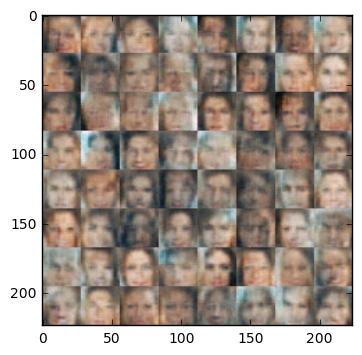

step 620, (epoch 1/1)... discriminator loss: 0.839... generator loss: 1.264
step 640, (epoch 1/1)... discriminator loss: 0.957... generator loss: 2.392
step 660, (epoch 1/1)... discriminator loss: 0.863... generator loss: 1.191
step 680, (epoch 1/1)... discriminator loss: 0.727... generator loss: 1.479
step 700, (epoch 1/1)... discriminator loss: 0.898... generator loss: 1.314
step 720, (epoch 1/1)... discriminator loss: 0.920... generator loss: 1.257
step 740, (epoch 1/1)... discriminator loss: 0.714... generator loss: 1.974
step 760, (epoch 1/1)... discriminator loss: 0.804... generator loss: 1.864
step 780, (epoch 1/1)... discriminator loss: 0.671... generator loss: 1.552
step 800, (epoch 1/1)... discriminator loss: 1.074... generator loss: 1.719


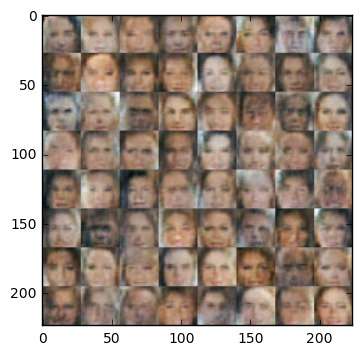

step 820, (epoch 1/1)... discriminator loss: 0.927... generator loss: 1.082
step 840, (epoch 1/1)... discriminator loss: 0.947... generator loss: 2.013
step 860, (epoch 1/1)... discriminator loss: 0.747... generator loss: 1.407
step 880, (epoch 1/1)... discriminator loss: 1.014... generator loss: 1.288
step 900, (epoch 1/1)... discriminator loss: 0.805... generator loss: 1.454
step 920, (epoch 1/1)... discriminator loss: 1.181... generator loss: 0.664
step 940, (epoch 1/1)... discriminator loss: 1.213... generator loss: 0.639
step 960, (epoch 1/1)... discriminator loss: 0.968... generator loss: 0.976
step 980, (epoch 1/1)... discriminator loss: 0.893... generator loss: 1.078
step 1000, (epoch 1/1)... discriminator loss: 1.300... generator loss: 0.606


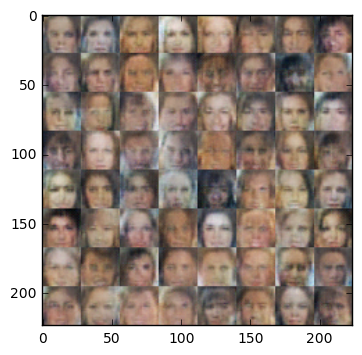

step 1020, (epoch 1/1)... discriminator loss: 0.863... generator loss: 2.168
step 1040, (epoch 1/1)... discriminator loss: 1.009... generator loss: 1.185
step 1060, (epoch 1/1)... discriminator loss: 0.786... generator loss: 1.404
step 1080, (epoch 1/1)... discriminator loss: 0.904... generator loss: 1.574
step 1100, (epoch 1/1)... discriminator loss: 0.886... generator loss: 1.229
step 1120, (epoch 1/1)... discriminator loss: 0.886... generator loss: 1.205
step 1140, (epoch 1/1)... discriminator loss: 0.949... generator loss: 1.194
step 1160, (epoch 1/1)... discriminator loss: 1.008... generator loss: 3.700
step 1180, (epoch 1/1)... discriminator loss: 0.979... generator loss: 4.396
step 1200, (epoch 1/1)... discriminator loss: 0.615... generator loss: 2.017


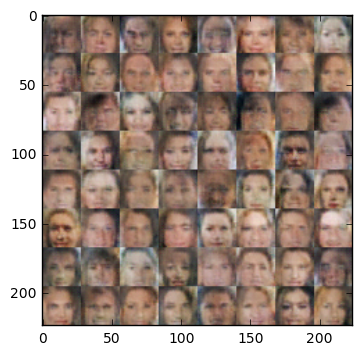

step 1220, (epoch 1/1)... discriminator loss: 1.010... generator loss: 0.853
step 1240, (epoch 1/1)... discriminator loss: 1.290... generator loss: 0.588
step 1260, (epoch 1/1)... discriminator loss: 0.905... generator loss: 1.065
step 1280, (epoch 1/1)... discriminator loss: 0.630... generator loss: 3.022
step 1300, (epoch 1/1)... discriminator loss: 0.639... generator loss: 1.952
step 1320, (epoch 1/1)... discriminator loss: 0.903... generator loss: 1.250
step 1340, (epoch 1/1)... discriminator loss: 0.741... generator loss: 3.140
step 1360, (epoch 1/1)... discriminator loss: 0.963... generator loss: 0.933
step 1380, (epoch 1/1)... discriminator loss: 0.655... generator loss: 1.811
step 1400, (epoch 1/1)... discriminator loss: 1.157... generator loss: 0.708


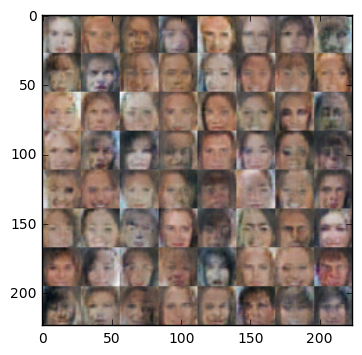

step 1420, (epoch 1/1)... discriminator loss: 0.799... generator loss: 2.211
step 1440, (epoch 1/1)... discriminator loss: 1.360... generator loss: 0.515
step 1460, (epoch 1/1)... discriminator loss: 0.839... generator loss: 1.110
step 1480, (epoch 1/1)... discriminator loss: 0.986... generator loss: 0.979
step 1500, (epoch 1/1)... discriminator loss: 0.797... generator loss: 1.219
step 1520, (epoch 1/1)... discriminator loss: 0.759... generator loss: 1.242
step 1540, (epoch 1/1)... discriminator loss: 0.601... generator loss: 1.917
step 1560, (epoch 1/1)... discriminator loss: 0.924... generator loss: 1.053
step 1580, (epoch 1/1)... discriminator loss: 0.732... generator loss: 1.663
step 1600, (epoch 1/1)... discriminator loss: 0.649... generator loss: 1.575


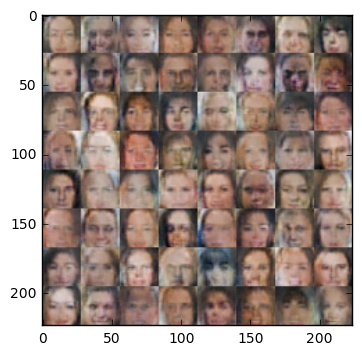

step 1620, (epoch 1/1)... discriminator loss: 0.961... generator loss: 1.014
step 1640, (epoch 1/1)... discriminator loss: 1.617... generator loss: 0.381
step 1660, (epoch 1/1)... discriminator loss: 0.894... generator loss: 1.203
step 1680, (epoch 1/1)... discriminator loss: 0.675... generator loss: 1.766
step 1700, (epoch 1/1)... discriminator loss: 0.910... generator loss: 1.103
step 1720, (epoch 1/1)... discriminator loss: 0.803... generator loss: 1.441
step 1740, (epoch 1/1)... discriminator loss: 0.935... generator loss: 0.940
step 1760, (epoch 1/1)... discriminator loss: 0.764... generator loss: 1.335
step 1780, (epoch 1/1)... discriminator loss: 0.730... generator loss: 1.809
step 1800, (epoch 1/1)... discriminator loss: 0.523... generator loss: 2.266


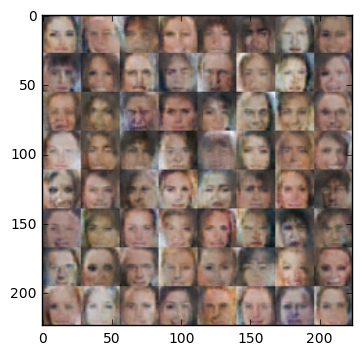

step 1820, (epoch 1/1)... discriminator loss: 1.129... generator loss: 0.785
step 1840, (epoch 1/1)... discriminator loss: 0.720... generator loss: 2.737
step 1860, (epoch 1/1)... discriminator loss: 0.876... generator loss: 1.104
step 1880, (epoch 1/1)... discriminator loss: 0.833... generator loss: 1.266
step 1900, (epoch 1/1)... discriminator loss: 0.687... generator loss: 1.567
step 1920, (epoch 1/1)... discriminator loss: 1.263... generator loss: 0.590
step 1940, (epoch 1/1)... discriminator loss: 0.738... generator loss: 1.287
step 1960, (epoch 1/1)... discriminator loss: 1.001... generator loss: 0.935
step 1980, (epoch 1/1)... discriminator loss: 1.122... generator loss: 0.806
step 2000, (epoch 1/1)... discriminator loss: 0.818... generator loss: 1.273


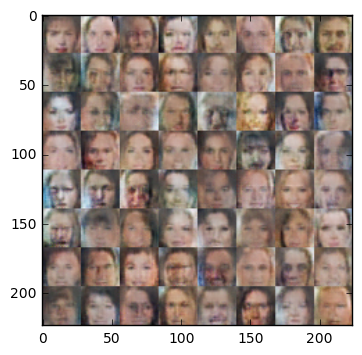

step 2020, (epoch 1/1)... discriminator loss: 1.655... generator loss: 0.380
step 2040, (epoch 1/1)... discriminator loss: 0.906... generator loss: 0.986
step 2060, (epoch 1/1)... discriminator loss: 0.955... generator loss: 1.715
step 2080, (epoch 1/1)... discriminator loss: 0.490... generator loss: 2.496
step 2100, (epoch 1/1)... discriminator loss: 1.402... generator loss: 0.532
step 2120, (epoch 1/1)... discriminator loss: 0.780... generator loss: 2.573
step 2140, (epoch 1/1)... discriminator loss: 0.878... generator loss: 1.122
step 2160, (epoch 1/1)... discriminator loss: 0.947... generator loss: 2.007
step 2180, (epoch 1/1)... discriminator loss: 0.944... generator loss: 1.235
step 2200, (epoch 1/1)... discriminator loss: 1.049... generator loss: 2.307


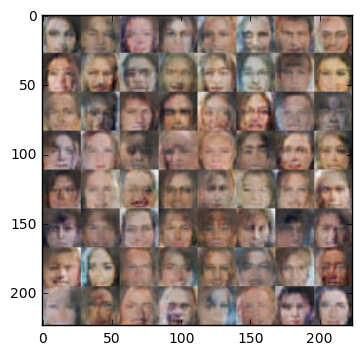

step 2220, (epoch 1/1)... discriminator loss: 0.609... generator loss: 2.199
step 2240, (epoch 1/1)... discriminator loss: 1.109... generator loss: 4.553
step 2260, (epoch 1/1)... discriminator loss: 0.712... generator loss: 1.556
step 2280, (epoch 1/1)... discriminator loss: 0.658... generator loss: 1.554
step 2300, (epoch 1/1)... discriminator loss: 0.769... generator loss: 2.297
step 2320, (epoch 1/1)... discriminator loss: 1.000... generator loss: 0.922
step 2340, (epoch 1/1)... discriminator loss: 0.933... generator loss: 1.001
step 2360, (epoch 1/1)... discriminator loss: 0.732... generator loss: 3.601
step 2380, (epoch 1/1)... discriminator loss: 0.570... generator loss: 2.051
step 2400, (epoch 1/1)... discriminator loss: 1.013... generator loss: 2.136


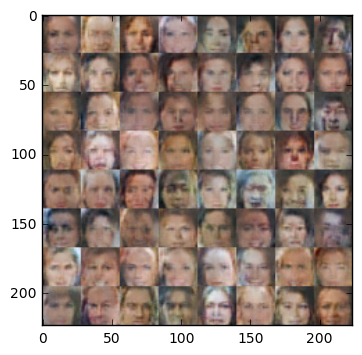

step 2420, (epoch 1/1)... discriminator loss: 0.779... generator loss: 1.298
step 2440, (epoch 1/1)... discriminator loss: 0.573... generator loss: 1.933
step 2460, (epoch 1/1)... discriminator loss: 0.979... generator loss: 0.945
step 2480, (epoch 1/1)... discriminator loss: 0.850... generator loss: 1.247
step 2500, (epoch 1/1)... discriminator loss: 1.185... generator loss: 0.670
step 2520, (epoch 1/1)... discriminator loss: 0.541... generator loss: 2.703
step 2540, (epoch 1/1)... discriminator loss: 0.836... generator loss: 2.087
step 2560, (epoch 1/1)... discriminator loss: 0.644... generator loss: 1.714
step 2580, (epoch 1/1)... discriminator loss: 0.676... generator loss: 2.097
step 2600, (epoch 1/1)... discriminator loss: 0.700... generator loss: 1.910


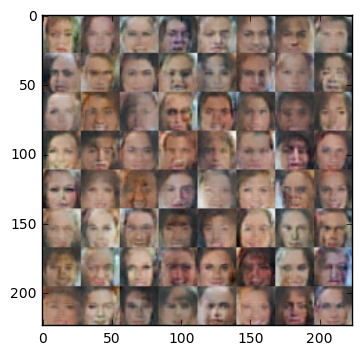

step 2620, (epoch 1/1)... discriminator loss: 0.784... generator loss: 3.188
step 2640, (epoch 1/1)... discriminator loss: 0.632... generator loss: 2.742
step 2660, (epoch 1/1)... discriminator loss: 1.293... generator loss: 0.592
step 2680, (epoch 1/1)... discriminator loss: 0.861... generator loss: 1.216
step 2700, (epoch 1/1)... discriminator loss: 0.646... generator loss: 1.643
step 2720, (epoch 1/1)... discriminator loss: 0.859... generator loss: 1.172
step 2740, (epoch 1/1)... discriminator loss: 0.727... generator loss: 1.495
step 2760, (epoch 1/1)... discriminator loss: 0.738... generator loss: 1.916
step 2780, (epoch 1/1)... discriminator loss: 0.737... generator loss: 1.775
step 2800, (epoch 1/1)... discriminator loss: 1.159... generator loss: 0.729


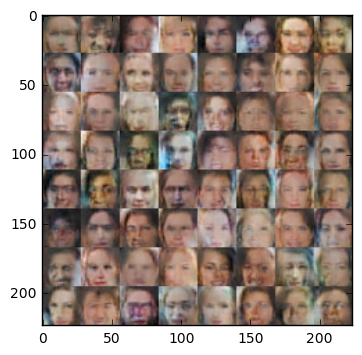

step 2820, (epoch 1/1)... discriminator loss: 1.079... generator loss: 3.048
step 2840, (epoch 1/1)... discriminator loss: 0.747... generator loss: 1.450
step 2860, (epoch 1/1)... discriminator loss: 0.602... generator loss: 2.054
step 2880, (epoch 1/1)... discriminator loss: 0.756... generator loss: 1.419
step 2900, (epoch 1/1)... discriminator loss: 1.009... generator loss: 0.890
step 2920, (epoch 1/1)... discriminator loss: 0.559... generator loss: 2.881
step 2940, (epoch 1/1)... discriminator loss: 0.853... generator loss: 1.181
step 2960, (epoch 1/1)... discriminator loss: 1.231... generator loss: 0.622
step 2980, (epoch 1/1)... discriminator loss: 0.650... generator loss: 2.552
step 3000, (epoch 1/1)... discriminator loss: 0.491... generator loss: 2.462


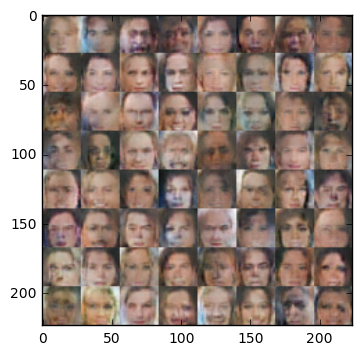

step 3020, (epoch 1/1)... discriminator loss: 0.973... generator loss: 0.948
step 3040, (epoch 1/1)... discriminator loss: 0.685... generator loss: 1.701
step 3060, (epoch 1/1)... discriminator loss: 0.658... generator loss: 1.979
step 3080, (epoch 1/1)... discriminator loss: 0.696... generator loss: 1.564
step 3100, (epoch 1/1)... discriminator loss: 1.115... generator loss: 0.819
step 3120, (epoch 1/1)... discriminator loss: 0.766... generator loss: 1.481
step 3140, (epoch 1/1)... discriminator loss: 1.060... generator loss: 0.925
step 3160, (epoch 1/1)... discriminator loss: 0.526... generator loss: 2.761


In [67]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.